#### Levels

In this notebook we'll take a look at how to run `et_look` at different levels than the standard `level_1`.

In [ ]:
!pip install pywapor==2.4.1 --quiet

First we redefine some of the basic inputs variables that we've also seen in the previous notebooks. This time however, we will choose a period of 1 day and a `composite_length` of 1 day, in order to keep download times down.

In [1]:
import pywapor

project_folder = r"/Users/hmcoerver/pywapor_notebooks"
latlim = [28.9, 29.7]
lonlim = [30.2, 31.2]
startdate = "2021-07-06"
enddate = "2021-07-07"
composite_length = 1

##### Level-2 inputs

Now that we have run ETLook for a simple use case, we'll have a look at how to run it at different levels and with different input datasets.

When downloading input data with `pywapor.pre_et_look.main` as we did before, it is possible to select a level for which to download data. By default, this level is set to `level_1`.

We can have a closer look at what this actually means by running the following functions.






In [2]:
level = "level_1"
levels = pywapor.general.variables.get_source_level_selections()

The variable `levels` now contains a dictionary with the source-selections for each ET_Look input variable at each level. E.g. to see the sources for the data used at level-1, we can do the following.

In [3]:
levels["level_1"]

{'ndvi': ['MOD13', 'MYD13'],
 'r0': ['MCD43'],
 'lst': ['MOD11', 'MYD11'],
 'lulc': ['WAPOR'],
 'z': ['SRTM'],
 'p_24': ['CHIRPS'],
 'ra_24': ['MERRA2'],
 't_air_24': ['GEOS5'],
 't_air_min_24': ['GEOS5'],
 't_air_max_24': ['GEOS5'],
 'u2m_24': ['GEOS5'],
 'v2m_24': ['GEOS5'],
 'p_air_0_24': ['GEOS5'],
 'qv_24': ['GEOS5'],
 't_air_i': ['GEOS5'],
 'u2m_i': ['GEOS5'],
 'v2m_i': ['GEOS5'],
 'qv_i': ['GEOS5'],
 'wv_i': ['GEOS5'],
 'p_air_i': ['GEOS5'],
 'p_air_0_i': ['GEOS5'],
 'lw_offset': ['STATICS'],
 'lw_slope': ['STATICS'],
 'r0_bare': ['STATICS'],
 'r0_full': ['STATICS'],
 'rn_offset': ['STATICS'],
 'rn_slope': ['STATICS'],
 't_amp_year': ['STATICS'],
 't_opt': ['STATICS'],
 'vpd_slope': ['STATICS'],
 'z_oro': ['STATICS']}

You can see that at level-1, e.g. `ndvi` data comes from `MOD13` and `MYD13`, while daily precipitation (`p_24`) comes from the `CHIRPS` dataset. So by checking the keys of this dictionary, we can see which pre-defined levels are available in this version of pyWAPOR.

> If you want to find some more information about these variables, you can get a dictionary with definitions and units for each variable by running `defs = pywapor.general.variables.get_var_definitions()` and then e.g. `defs["rn_offset"]`.

In [4]:
print(levels.keys())

dict_keys(['level_1', 'level_2'])


Let's have a look at the datasets used for `level_2`.

In [5]:
levels["level_2"]

{'ndvi': ['PROBAV'],
 'r0': ['PROBAV'],
 'lst': ['MOD11', 'MYD11'],
 'lulc': ['WAPOR'],
 'z': ['SRTM'],
 'p_24': ['CHIRPS'],
 'ra_24': ['MERRA2'],
 't_air_24': ['GEOS5'],
 't_air_min_24': ['GEOS5'],
 't_air_max_24': ['GEOS5'],
 'u2m_24': ['GEOS5'],
 'v2m_24': ['GEOS5'],
 'p_air_0_24': ['GEOS5'],
 'qv_24': ['GEOS5'],
 't_air_i': ['GEOS5'],
 'u2m_i': ['GEOS5'],
 'v2m_i': ['GEOS5'],
 'qv_i': ['GEOS5'],
 'wv_i': ['GEOS5'],
 'p_air_i': ['GEOS5'],
 'p_air_0_i': ['GEOS5'],
 'lw_offset': ['STATICS'],
 'lw_slope': ['STATICS'],
 'r0_bare': ['STATICS'],
 'r0_full': ['STATICS'],
 'rn_offset': ['STATICS'],
 'rn_slope': ['STATICS'],
 't_amp_year': ['STATICS'],
 't_opt': ['STATICS'],
 'vpd_slope': ['STATICS'],
 'z_oro': ['STATICS']}

As you can see, the difference between `level_1` and `level_2` is the dataset used to create the NDVI and ALBEDO inputs. For `level_2`, they are derived from PROBA-V images, which have a higher resolution (~100m) than the MODIS products (~250m for NDVI).

Let's give `level_2` a try! Beware though, that the downloading of the PROBA-V images can take some time! 

> ⚠️  
>
> You'll notice that you'll be prompted for another username and password. This time for a [VITO account](https://www.vito-eodata.be/PDF/portal/Application.html). We could set this account up by running `pywapor.collect.setup_dl_accounts.setup_account("VITO")` as well (like we did before for the NASA and WAPOR accounts). But `pywapor.pre_et_look.main` also checks if the required accounts can be found and gives a prompt if thats's not the case. 
>
>You can create a VITO account [here](https://www.vito-eodata.be/PDF/portal/Application.html).
>
> ⚠️  


We run `pywapor.pre_et_look.main` the same way as we've done previously, but now we add the parameter specifying the level (which has a default value of `"level_1"`) and the composite_length of 1 day (instead of the default `"DEKAD"`).

In [6]:
level = "level_2"

ds, fh = pywapor.pre_et_look.main(project_folder, startdate, enddate, 
                                    latlim, lonlim, level = level,
                                    composite_length = composite_length)

> PRE_ET_LOOK
    # ndvi
    --> Testing VITO un/pw.
    --> VITO un/pw working.
    --> Downloading PROBAV.
100%|██████████| 375M/375M [04:57<00:00, 1.26MBytes/s]
2021.07.06: Saving finals.    : 100%|██████████| 10.0/10.0 [13:35<00:00, 81.5s/it]
    --> Resampling resolution is ~103 meter.
    --> Resampling datasets.
    --> Calculating composites.
    # p_24
    --> Downloading CHIRPS.
Tile: 2 / 2: 0.00Bytes [00:00, ?Bytes/s]
    --> Resampling datasets.
    --> Calculating composites.
    # se_root
    > PRE_SE_ROOT
        # ndvi
        --> Downloading PROBAV.
2021.07.06:               : 100%|██████████| 10.0/10.0 [00:00<00:00, 3.37kit/s]
        --> Resampling resolution is ~103 meter.
        --> Resampling datasets.
        # lst
        --> Downloading MOD11.
Tile: 2 / 2: 0.00Bytes [00:00, ?Bytes/s]
        --> Downloading MYD11.
Tile: 2 / 2: 0.00Bytes [00:00, ?Bytes/s]
        --> Resampling datasets.
        > METEO
            # t_air_i
            --> Downloading GEOS5 (3

We can check the contents of our `project_folder` again by running the following code.

In [7]:
!ls *

log.txt

RAW:
CHIRPS  GEOS5   MERRA2  MODIS   PROBAV  SRTM    STATICS WAPOR

level_2:
et_look_input.nc  se_root_input.nc  se_root_output    se_root_output.nc


And inspect the xarray.Dataset like this. Notice the `pixel_size` and the size of the `lat` and `lon` dimensions.

In [8]:
ds

<xarray.Dataset>
Dimensions:       (epoch: 1, lon: 1009, lat: 807)
Coordinates:
  * epoch         (epoch) int64 0
  * lon           (lon) float64 30.2 30.2 30.2 30.2 30.2 ... 31.2 31.2 31.2 31.2
  * lat           (lat) float64 29.7 29.7 29.7 29.7 29.7 ... 28.9 28.9 28.9 28.9
    epoch_starts  (epoch) datetime64[ns] ...
    epoch_ends    (epoch) datetime64[ns] ...
Data variables: (12/32)
    ndvi          (epoch, lat, lon) float32 ...
    p_24          (epoch, lat, lon) float32 ...
    se_root       (epoch, lat, lon) float32 ...
    r0            (epoch, lat, lon) float32 ...
    z             (lat, lon) float32 ...
    land_mask     (epoch, lat, lon) float32 ...
    ...            ...
    z_oro         (lat, lon) float32 ...
    t_diff        (lat, lon) float32 ...
    slope         (lat, lon) float32 ...
    aspect        (lat, lon) float32 ...
    lat_deg       (lat, lon) float32 ...
    lon_deg       (lat, lon) float32 ...
Attributes:
    geotransform:  [ 3.01994050e+01  9.92063500e-04  0.00000000e+00  2.970039...
    projection:    GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137...
    pixel_size:    103.25558167780254
    example_file:  /Users/hmcoerver/pywapor_notebooks/RAW/PROBAV/NDVI/NDVI_PR...

Next, we can run ETLook using the `level_2` data just like we did for `level_1`.

In [9]:
ds = pywapor.et_look.main(fh)

--> Running ETLook_v2


--> Saving outputs.


We can calculate some statistic, like we did before.

In [10]:
import numpy as np

et_data = ds.et_24_mm.isel(epoch = 0).values

print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

resolution: (807, 1009)
total pixels: 814263
number of pixels with missing data: 328446
maximum value: 8.34
minimum value: 0.00
mean: 0.85
median: 0.15


Notice that the amount of pixels with missing data is now much higher. Which we can also see on a map of the higher resolution daily ET.

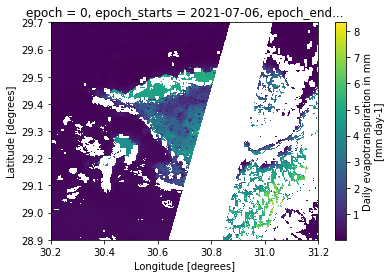

In [11]:
%matplotlib inline
ds.et_24_mm.isel(epoch = 0).plot()

Since we used a very short `composite_length` in this notebook (to keep the time required to download the data down), the chances of a pixel having no valid data increases (e.g. there is less time per composite to acquire a cloudfree measurement). Also, since we only processed one epoch, temporal interpolation wasn't possible. 

##### Custom inputs

Besides using the predefined levels, it is also possible to create your own custom level. Instead of passing a string to the `level` input parameter of `pywapor.pre_et_look.main`, we can also pass a dictionary that specifies which products we would like to use.

Lets start by creating such a dictionary by choosing some sources from this table.


| Source | Temporal Availability | Temporal Resolution |Spatial Resolution | Used For |
| ------ | ------ | ------ | ------ | ------ |
|[MOD13](https://lpdaac.usgs.gov/products/mod13q1v006/) | 2000-02-18 - ongoing | 16-Daily |250m|NDVI|
|[MYD13](https://lpdaac.usgs.gov/products/myd13q1v006/) | 2002-07-04 - ongoing | 16-Daily |250m|NDVI|
|[MCD43](https://lpdaac.usgs.gov/products/mcd43a1v006/)|2000-02-16 - ongoing|Daily|500m|Albedo|
|[MOD11](https://lpdaac.usgs.gov/products/mod11a1v006/) | 2000-02-24 - ongoing | Daily | 1000m | LST |
|[MYD11](https://lpdaac.usgs.gov/products/myd11a1v006/)| 2002-07-04 - ongoing | Daily | 1000m | LST |
|[PROBAV](https://www.vito-eodata.be/collectioncatalogue/srv/eng/catalog.search#/metadata/urn:ogc:def:EOP:VITO:PROBAV_S5-TOC_100M_V001)|2014-03-11 - ongoing|5-Daily|100m|NDVI, Albedo|
| [GEOS5](https://geos5.org) | 2017-12-01 - ongoing | 3-Hourly |0.3125°×0.25° | Meteo |
| [MERRA2](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/) | 1980-01-01 - ongoing | Hourly | 0.625°×0.5° | Meteo | 
| [CHIRPS](https://www.chc.ucsb.edu/data/chirps) |  1981-01-01 - ongoing | Daily | 0.05° | Precipitation |
| [WAPOR](https://wapor.apps.fao.org/catalog/WAPOR_2/1/L1_LCC_A) | 2009 - 2020 | Yearly |250m | Landcover |
| [GLOBCOVER](http://due.esrin.esa.int/page_globcover.php) | 2009 | Single| 250m | Landcover |
| [SRTM](https://srtm.csi.cgiar.org) | 2009 | Single | 90m | DEM |


In [13]:
my_custom_level = {
        # Main inputs
        "ndvi":         ["PROBAV", "MOD13", "MYD13"],
        "r0":           ["PROBAV", "MCD43"],
        "lst":          ["MOD11", "MYD11"],
        "lulc":         ["GLOBCOVER"],
        "z":            ["SRTM"],
        "p_24":         ["CHIRPS"],
        "ra_24":        ["MERRA2"],

        # Daily meteo 
        't_air_24':     ["MERRA2", "GEOS5"],
        't_air_min_24': ["MERRA2"], 
        't_air_max_24': ["MERRA2"],
        'u2m_24':       ["GEOS5"],
        'v2m_24':       ["GEOS5"],
        'p_air_0_24':   ["MERRA2"],
        'qv_24':        ["MERRA2", "GEOS5"],

        # Instanteneous meteo
        "t_air_i":      ["MERRA2"],
        "u2m_i":        ["MERRA2"],
        "v2m_i":        ["MERRA2"],
        "qv_i":         ["MERRA2"],
        "wv_i":         ["MERRA2"],
        "p_air_i":      ["MERRA2"],
        "p_air_0_i":    ["MERRA2"],

        # Temporal Constants
        "lw_offset":    ["STATICS"],
        "lw_slope":     ["STATICS"],
        "r0_bare":      ["STATICS"],
        "r0_full":      ["STATICS"],
        "rn_offset":    ["STATICS"],
        "rn_slope":     ["STATICS"],
        "t_amp_year":   ["STATICS"],
        "t_opt":        ["STATICS"],
        "vpd_slope":    ["STATICS"],
        "z_oro":        ["STATICS"],
}

Finally, we can give a name to the custom level (although this is not required, the default name is `custom`) and then start downloading the required data.

In [14]:
my_custom_level["level_name"] = "my_first_custom_level"

ds, fh = pywapor.pre_et_look.main(project_folder, startdate, enddate, 
                                    latlim, lonlim, level = my_custom_level,
                                    composite_length = composite_length)

> PRE_ET_LOOK
    # ndvi
    --> Downloading PROBAV.
2021.07.06:               : 100%|██████████| 10.0/10.0 [00:00<00:00, 4.67kit/s]
    --> Downloading MOD13.
Tile: 2 / 2: 0.00Bytes [00:00, ?Bytes/s]
    --> Downloading MYD13.
Tile: 1 / 1: 0.00Bytes [00:00, ?Bytes/s]
    --> Resampling resolution is ~103 meter.
    --> Resampling datasets.
    --> Interpolating 1,139,719 of 1,139,719 missing pixels.
    --> Calculating composites.
    # p_24
    --> Downloading CHIRPS.
Tile: 2 / 2: 0.00Bytes [00:00, ?Bytes/s]
    --> Resampling datasets.
    --> Calculating composites.
    # se_root
    > PRE_SE_ROOT
        # ndvi
        --> Downloading PROBAV.
2021.07.06:               : 100%|██████████| 10.0/10.0 [00:00<00:00, 5.02kit/s]
        --> Downloading MOD13.
Tile: 2 / 2: 0.00Bytes [00:00, ?Bytes/s]
        --> Downloading MYD13.
Tile: 1 / 1: 0.00Bytes [00:00, ?Bytes/s]
        --> Resampling resolution is ~103 meter.
        --> Resampling datasets.
        # lst
        --> Downloading 

Notice how we are now combining PROBAV and MODIS datasets and even GEOS5 and MERRA2 for several meteo-datasets!

In [15]:
for var in ["ndvi", "qv_24", "t_air_24", "r0"]:
    print(f"'{var}'-composites are made from: {ds[var].attrs['sources']} \n")

'ndvi'-composites are made from: ['PROBAV', 'MOD13Q1', 'MYD13Q1'] 

'qv_24'-composites are made from: ['MERRA2', 'GEOS5'] 

't_air_24'-composites are made from: ['MERRA2', 'GEOS5'] 

'r0'-composites are made from: ['PROBAV', 'MCD43A3'] 



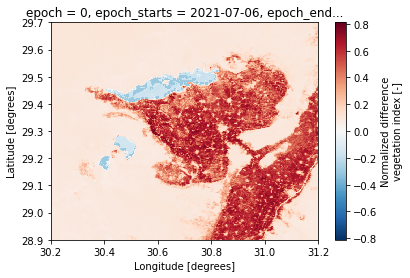

In [16]:
ds.ndvi.isel(epoch = 0).plot()

And then again, run `pwapor.et_look.main` like this.

In [17]:
ds = pywapor.et_look.main(fh)

--> Running ETLook_v2


--> Saving outputs.


Notice how the nodata areas from before have been filled in thanks to temporal interpolation!

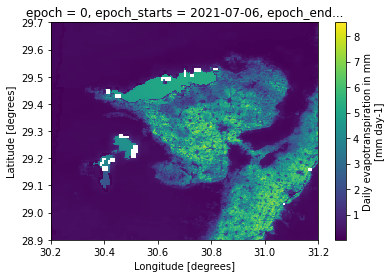

In [18]:
ds.et_24_mm.isel(epoch =0 ).plot()